# A4 - Baseline Modeling

1. Build a random predictor
2. Build a majority class predictors
3. Build a KNN model

These models are slowly increasing in complexity and likelihood of having reasonable predictions.


## Imports

In [16]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, neighbors

In [17]:
seed = 13 # DON'T CHANGE

## Load Required Data

In [18]:
train_pa_df = pd.read_csv(r"C:\Users\gangu\Downloads\train_pa_genes.csv")

In [19]:
train_pa_df.head()

,genome_id,gb|U00096.3|-|3324062-3324911|ARO:3003386|Ecol_folP_SLF,gb|AP009048.1|+|3760295-3762710|ARO:3003303|Ecol_gyrB_AMU,gb|BA000007.3|+|4990267-4994296|ARO:3003288|Ecol_rpoB_RIF,gb|AH002539.2|+|1760-2945|ARO:3003368|Ecol_EFTu_KIR,gb|AE014075.1|-|3901532-3902762|ARO:3003369|Ecol_EFTu_PLV,gb|U00096.3|-|2336792-2339420|ARO:3003294|Ecol_gyrA_FLO,gb|AE006468.2|-|4038867-4041282|ARO:3003307|Sser_gyrB_FLO,gb|HG738867.1|+|2934266-2935658|ARO:3003890|Ecol_UhpT_FOF,gb|HG738867.1|-|2233288-2234647|ARO:3003889|Ecol_GlpT_FOF,...,gb|X01702.1|+|484-1285|ARO:3002659|APH(6)-Ic,gb|JX259319.1|+|0-681|ARO:3002771|QnrB58,gb|EU675686.2|+|3196-4042|ARO:3002616|aadA16,gb|HQ418999.2|+|0-681|ARO:3002746|QnrB31,gb|JX423831.1|+|2676-3474|ARO:3001778|OXA-232,gb|AY536519.1|+|37-937|ARO:3002372|VEB-3,gb|KJ158441.1|+|2732-3377|ARO:3002789|QnrD2,gb|KF526113.1|+|0-1146|ARO:3002112|CMY-100,gb|X03988.1|+|382-1642|ARO:3000363|EreB,gb|AJ310778.1|+|7003-7573|ARO:3003015|dfrA19
0,562.22444,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,562.42705,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,562.42733,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,562.42728,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,562.45644,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def load_data():
    """
    Load the data needed for Assignment 4
    """
    train_pa_df = pd.read_csv(r'C:\Users\gangu\Downloads\train_pa_genes.csv')
    train_pa_df = train_pa_df.set_index('genome_id')

    y_train = np.load(r'C:\Users\gangu\Downloads\y_train.npy', allow_pickle=True)
    y_train_ids = np.load(r'C:\Users\gangu\Downloads\train_ids.npy', allow_pickle=True).astype(str)
    
    return train_pa_df, y_train, y_train_ids

train_pa_df, y_train, y_train_ids = load_data()


In [6]:
train_pa_df.head()

,gb|U00096.3|-|3324062-3324911|ARO:3003386|Ecol_folP_SLF,gb|AP009048.1|+|3760295-3762710|ARO:3003303|Ecol_gyrB_AMU,gb|BA000007.3|+|4990267-4994296|ARO:3003288|Ecol_rpoB_RIF,gb|AH002539.2|+|1760-2945|ARO:3003368|Ecol_EFTu_KIR,gb|AE014075.1|-|3901532-3902762|ARO:3003369|Ecol_EFTu_PLV,gb|U00096.3|-|2336792-2339420|ARO:3003294|Ecol_gyrA_FLO,gb|AE006468.2|-|4038867-4041282|ARO:3003307|Sser_gyrB_FLO,gb|HG738867.1|+|2934266-2935658|ARO:3003890|Ecol_UhpT_FOF,gb|HG738867.1|-|2233288-2234647|ARO:3003889|Ecol_GlpT_FOF,gb|HG738867.1|+|2930707-2931298|ARO:3003893|Ecol_uhpA_FOF,...,gb|X01702.1|+|484-1285|ARO:3002659|APH(6)-Ic,gb|JX259319.1|+|0-681|ARO:3002771|QnrB58,gb|EU675686.2|+|3196-4042|ARO:3002616|aadA16,gb|HQ418999.2|+|0-681|ARO:3002746|QnrB31,gb|JX423831.1|+|2676-3474|ARO:3001778|OXA-232,gb|AY536519.1|+|37-937|ARO:3002372|VEB-3,gb|KJ158441.1|+|2732-3377|ARO:3002789|QnrD2,gb|KF526113.1|+|0-1146|ARO:3002112|CMY-100,gb|X03988.1|+|382-1642|ARO:3000363|EreB,gb|AJ310778.1|+|7003-7573|ARO:3003015|dfrA19
genome_id,,,,,,,,,,,,,,,,,,,,,
562.22444,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42705,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42733,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42728,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.45644,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y_train[0:5]

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S']], dtype=object)

In [22]:
X_train

array([0.98066073, 0.22926504, 0.10648666, 0.20676552, 0.72880471,
       0.51462095, 0.35865765, 0.08292327, 0.9661743 , 0.04917134,
       0.06161178, 0.51294518, 0.88438071, 0.84195461, 0.13078115,
       0.38339866, 0.85916333, 0.60927553, 0.41795093, 0.31389998,
       0.6200625 , 0.52126633, 0.66296498, 0.60621914, 0.33514914,
       0.40310947, 0.48546765, 0.62477129, 0.93116903, 0.65135216,
       0.28676521, 0.5508682 , 0.98154403, 0.54754144, 0.61660176,
       0.65201431, 0.96264769, 0.41423257, 0.7962014 , 0.38382581,
       0.83342811, 0.52902639, 0.44116625, 0.70761292, 0.9068154 ,
       0.41532075, 0.89979995, 0.97567113, 0.95301625, 0.0161108 ,
       0.94780611, 0.60171926, 0.63180006, 0.49919299, 0.55473951,
       0.53425063, 0.66048583, 0.80811233, 0.83777506, 0.9032151 ,
       0.38046499, 0.14296558, 0.25130491, 0.49461186, 0.32893197,
       0.2334593 , 0.2299627 , 0.56654516, 0.54872252, 0.22217801,
       0.96892866, 0.49008788, 0.65998128, 0.4296436 , 0.34556

In [24]:
# Preprocess X and y data
X_train = np.array(train_pa_df) # Convert X to numpy array
y_train = y_train.reshape(-1)   # Flatten Y from column matrix to vector

## 1. Build a Random Predictor

Build a simple model (as a function) which randomly predicts the output class

In [10]:
def random_predictor(X_train):
    """
    Random predictor model - generate random predictions for each input sample

    Inputs:
      - X_train (np.array): feature data

    Outputs:
      - y_pred (np.array): predictions array
    """
    # Add your code here
    n_samples = X_train.shape[0]
    y_pred = np.random.randint(0, 2, size=n_samples)
    return y_pred

#### Q1. Run this random predictor across the training data 100 times, what is the average accuracy on the training dataset?

In [13]:
# Add your code here
from sklearn.metrics import accuracy_score
X_train = np.random.rand(100)  
y_train = np.random.randint(0, 2, size=100) 


n_runs = 100
accuracies = []

for _ in range(n_runs):
    y_pred = random_predictor(X_train) 
    accuracy = accuracy_score(y_train, y_pred)  
    accuracies.append(accuracy)  

average_accuracy = np.mean(accuracies)

print(f"Average accuracy of the random predictor over 100 runs: {average_accuracy:.4f}")

Average accuracy of the random predictor over 100 runs: 0.5057


Accuracy of 50% indicates that each class is equally likely

## 2. Build a Majority Class Predictor

This time build a similar function but always predict the majority class
  
- Make sure to get the majority class from the data rather than assume
- Check the imports for a useful function

In [26]:
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')

Value: R, Count: 150
Value: S, Count: 598


In [27]:
def majority_predictor(X_train, y_train):
    """
    Majority predictor model - generate predictions for the majority class

    Inputs:
      - X_train (np.array): feature data
      - y_train (np.array): target data

    Outputs:
      - y_pred (np.array): predictions array
    """
    # Add your code here
    unique_values, counts = np.unique(y_train, return_counts=True)
    majority_class = unique_values[np.argmax(counts)]
    y_pred = np.full(X_train.shape[0], majority_class)
    
    return y_pred

#### Q2. Run this majority predictor once, what accuracy is achieved on the training dataset?

In [28]:
# Add your code here
y_pred = majority_predictor(X_train, y_train)

# Calculate accuracy
accuracy = np.mean(y_pred == y_train)  
print(f'Accuracy of the majority predictor on the training dataset: {accuracy:.4f}')

Accuracy of the majority predictor on the training dataset: 0.7995


The random predictor accuracy is 50% that is lower than the majority predictor 79%. This is because the majority predictor consistently selects the most prevalent class in the dataset, while the random predictor generates predictions without any systematic approach, leading to a chance-level accuracy.

## 3. Build a KNN Model

[Useful documentation for KNN models](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Build a simple KNN classifier:
- As we're training a model we need to split out some data for testing
- Lets try a few different values of K for n-neighbors

In [30]:
# Randomly select some IDs
idx_all = np.arange(X_train.shape[0])
val_ids = np.random.choice(idx_all, 100, replace=False)
train_ids = idx_all[~np.isin(idx_all, val_ids)]

# Subset data into train/validate
y_train_knn = y_train[train_ids]
X_train_knn = X_train[train_ids]

y_val_knn = y_train[val_ids]
X_val_knn = X_train[val_ids]

#### For every K from 1 to 50: train a KNN Classifier and calculate accuracy on validate
- Fit on train
- Predict on validation
- Calculate accuracy

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracy results
k_values = range(1, 51)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_val_knn)
    accuracy = accuracy_score(y_val_knn, y_pred)
    accuracies.append(accuracy)
for k, acc in zip(k_values, accuracies):
    print(f'K: {k}, Accuracy: {acc:.4f}')


K: 1, Accuracy: 0.8000
K: 2, Accuracy: 0.7900
K: 3, Accuracy: 0.8300
K: 4, Accuracy: 0.8000
K: 5, Accuracy: 0.8300
K: 6, Accuracy: 0.8500
K: 7, Accuracy: 0.8200
K: 8, Accuracy: 0.8200
K: 9, Accuracy: 0.8400
K: 10, Accuracy: 0.8500
K: 11, Accuracy: 0.8500
K: 12, Accuracy: 0.8500
K: 13, Accuracy: 0.8500
K: 14, Accuracy: 0.8600
K: 15, Accuracy: 0.8600
K: 16, Accuracy: 0.8700
K: 17, Accuracy: 0.8500
K: 18, Accuracy: 0.8700
K: 19, Accuracy: 0.8700
K: 20, Accuracy: 0.8700
K: 21, Accuracy: 0.8500
K: 22, Accuracy: 0.8600
K: 23, Accuracy: 0.8600
K: 24, Accuracy: 0.8700
K: 25, Accuracy: 0.8500
K: 26, Accuracy: 0.8500
K: 27, Accuracy: 0.8500
K: 28, Accuracy: 0.8500
K: 29, Accuracy: 0.8500
K: 30, Accuracy: 0.8500
K: 31, Accuracy: 0.8300
K: 32, Accuracy: 0.8500
K: 33, Accuracy: 0.8500
K: 34, Accuracy: 0.8500
K: 35, Accuracy: 0.8500
K: 36, Accuracy: 0.8400
K: 37, Accuracy: 0.8400
K: 38, Accuracy: 0.8400
K: 39, Accuracy: 0.8400
K: 40, Accuracy: 0.8400
K: 41, Accuracy: 0.8300
K: 42, Accuracy: 0.8400
K

#### Plot the validation accuracy as a function of K
- X axis = K
- Y axis = accuracy
- Rememeber to clearly label your plot

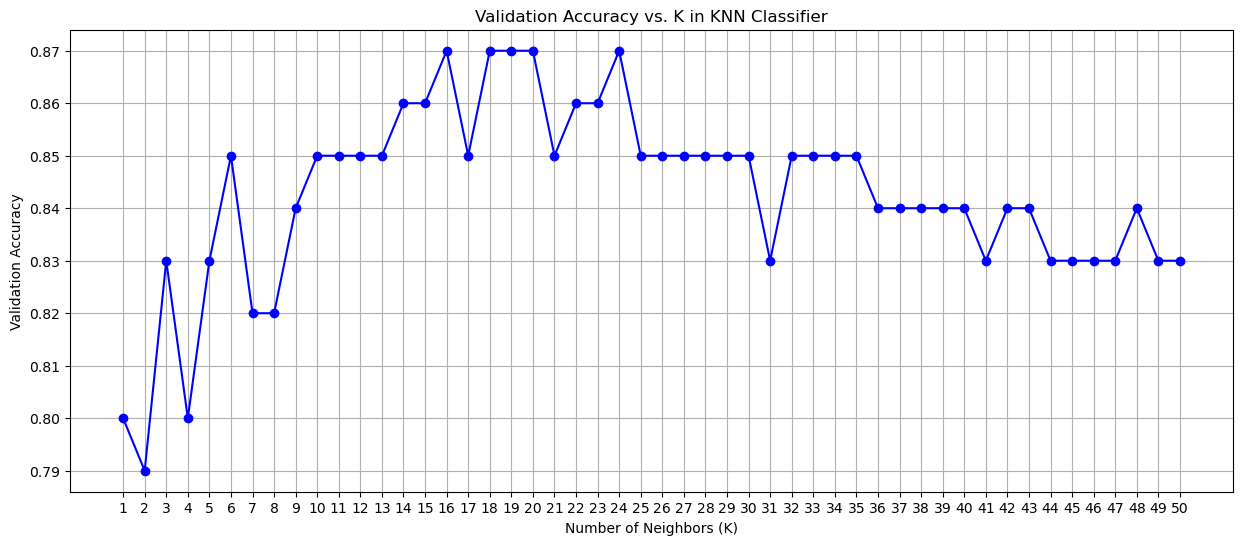

In [35]:
# Add your code here
plt.figure(figsize=(15, 6))
plt.plot(k_values, accuracies, marker='o', color='b', linestyle='-')
plt.title('Validation Accuracy vs. K in KNN Classifier')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()